In [1]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np

pplib.imports()

In [2]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))

ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))

ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')

ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', fontsize = 16)
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67, 33])

ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])
ds.displayAs('snapshot', [99, 67, 33], ['z = 0.0', 'z = 0.5', 'z = 2.0'])
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            ['HI $\\times$ Red\nCross-Power', 'HI $\\times$ Blue\nCross-Power',
            'HI $\\times$ Galaxy\nCross-Power', r'Color Ratio'])
ds.displayAs('post_process', ['corr_coef', 'theory_bias', 'obs_bias'], 
             ['r', '$b_{\\mathrm{th}}$', '$b_{\\mathrm{obs}}$'])

ds.setCmap('post_process', ['pink', 'lime', 'cyan'], ['corr_coef', 'theory_bias', 'obs_bias'])
ds.setCmap('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])
ds.setCmap('space', ['green', 'orange'], ['real', 'redshift'])
ds.setCmap('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], ['vn', 'hiptl', 'hisubhalo'])
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
snapshots.reverse()
ds.setCmap('snapshot', 'viridis', snapshots)
ds.displayAs('snapshot', snapshots, ['z = 0.0', 'z = 0.5', 'z = 2.0'])

ds.setXLabel(pplib.wnum())

# Investigate

## Compare the cross-powers across colors

The row values for space: ['real', 'redshift', 'rsd']
The column values for snapshot: [99, 67, 33]


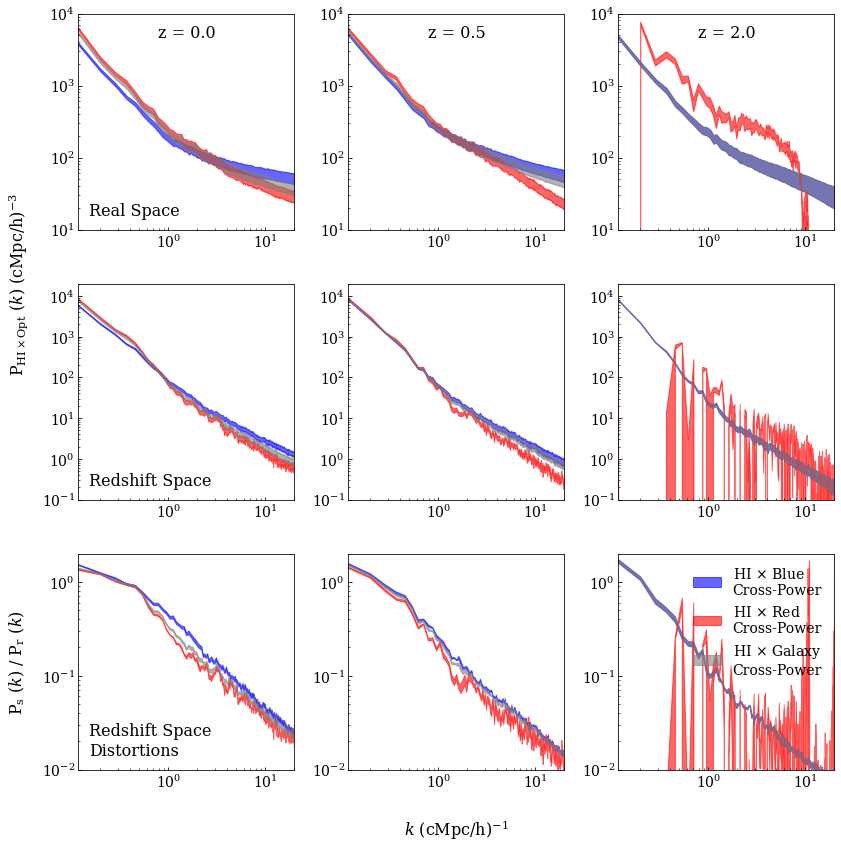

In [3]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red', 'resolved'], 'space':['real', 'redshift', 'rsd']}

fg = ds.figrid('color', 'space', 'snapshot', ip)
fg.autoFill(alpha = 0.6)
fg.axisArgs(ylim = (10, 1e4), slc = 'real')
fg.axisArgs(ylim = (0.1, 2e4), slc = 'redshift')
fg.axisArgs(ylim = (0.01, 2), slc = 'rsd')
fg.setYLabel([pplib.pklab('HI', 'Opt'), pplib.pkrat('s', 'r')], panels = [slice(0, 2), slice(2, 3)])
fg.plot()

### Z = 2.0 updates

* There are not nearly enough red galaxies to make any reasonable correlation
* Blue and All galaxies cases overlap at z = 2.0

## Directly compare redshifts for the cross-powers

The row values for space: ['real', 'redshift', 'rsd']
The column values for color: ['blue', 'red', 'resolved']


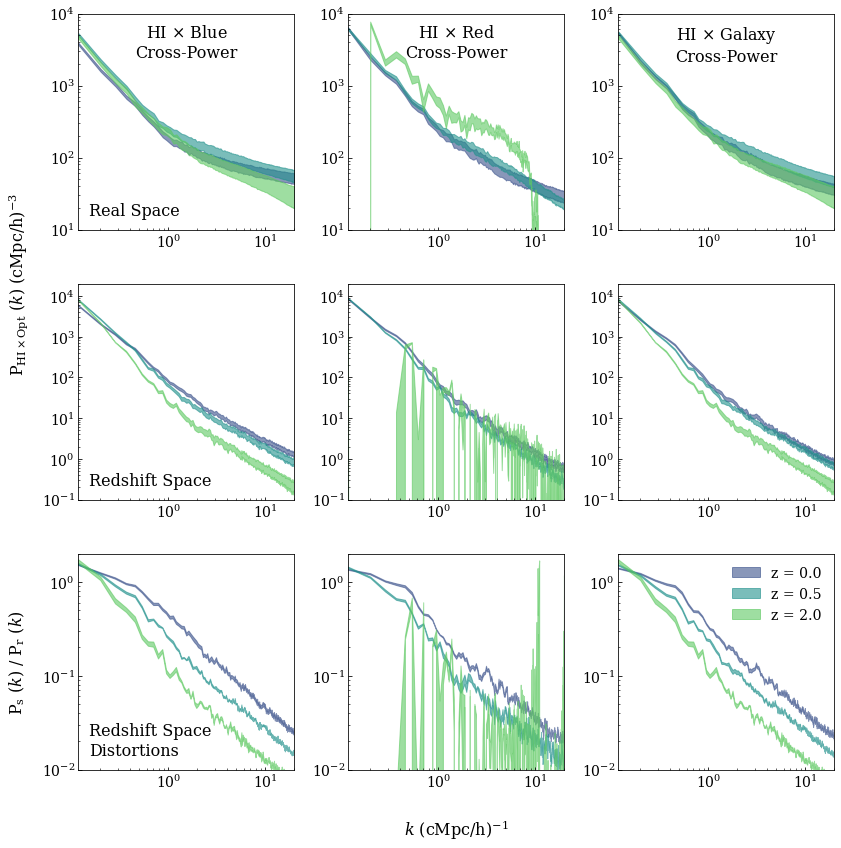

In [4]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red', 'resolved'], 'space':['real', 'redshift', 'rsd']}

fg = ds.figrid('snapshot', 'space', 'color', ip)
fg.autoFill(alpha = 0.6)
fg.axisArgs(ylim = (10, 1e4), slc = 'real')
fg.axisArgs(ylim = (0.1, 2e4), slc = 'redshift')
fg.axisArgs(ylim = (0.01, 2), slc = 'rsd')
fg.setYLabel([pplib.pklab('HI', 'Opt'), pplib.pkrat('s', 'r')], panels = [slice(0, 2), slice(2, 3)])
fg.plot()

### z = 2.0 Updates
* At z = 2 the normal expected redshift evolution in the real-space blue x HI returns
* Even in the HI x Galaxy cross-power, the z = 0 -> z = 0.5 is inverse of what is expected - in this case, it's due to HI evolution rather than galaxies.

## Bias + Correlation Coefficients - Comparing Colors

The row values for post_process: ['corr_coef', 'obs_bias', 'theory_bias']
The column values for snapshot: [99, 67, 33]


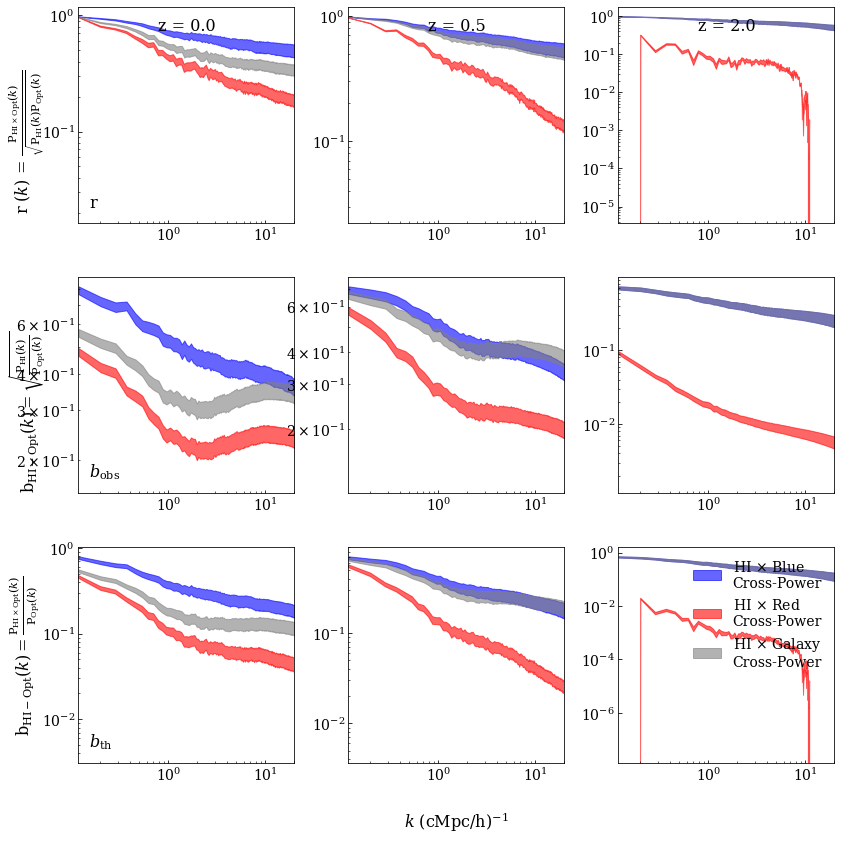

In [5]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':['corr_coef', 'obs_bias', 'theory_bias'],
     'color':['blue', 'red', 'resolved'], 'space':'real', 'denominator':['no key found', 'galaxy']}

fg = ds.figrid('color', 'post_process', 'snapshot', ip)
fg.autoFill(alpha = 0.6)
labels = [pplib.cclab('HI', 'Opt'), pplib.obsbiaslab('HI', 'Opt'), pplib.thbiaslab('HI', 'Opt')]
fg.setYLabel(labels, panels = [0, 1, 2])
fg.plot()

* only showing in real space, since we care about that much more.
* Plot number of each color galaxy with redshift w/wout dust

## Comparing the two bias definitions

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67, 33]


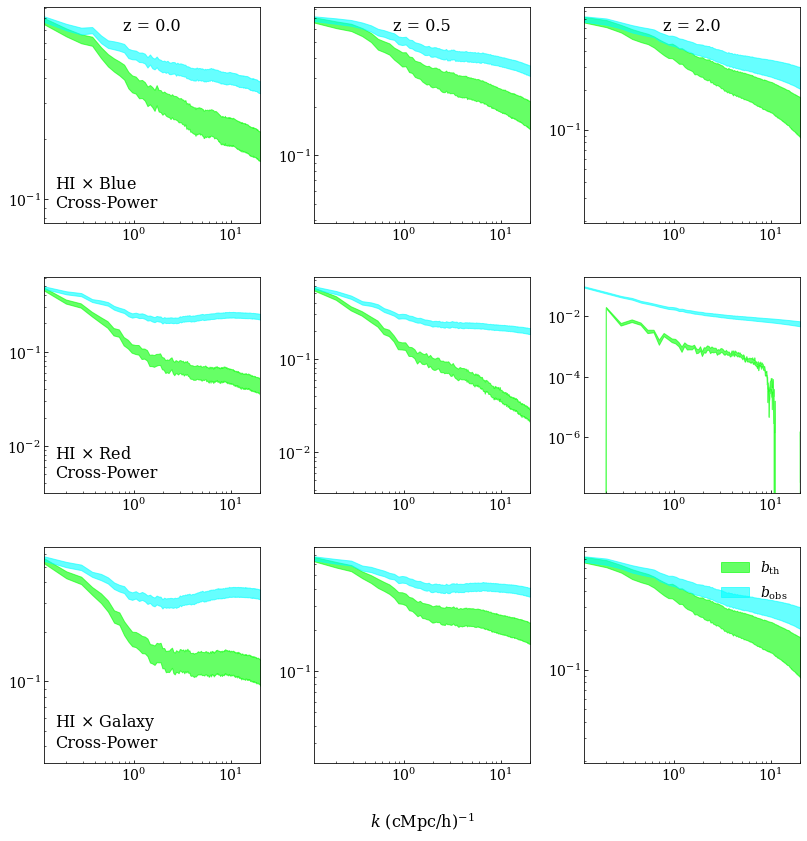

In [6]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':['obs_bias', 'theory_bias'],
     'color':['blue', 'red', 'resolved'], 'space':'real', 'denominator':['no key found', 'galaxy']}

fg = ds.figrid('post_process', 'color', 'snapshot', ip)
fg.autoFill(alpha = 0.6)
fg.plot()

## Compare these to the cross-powers that use hisubhalo

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67, 33]


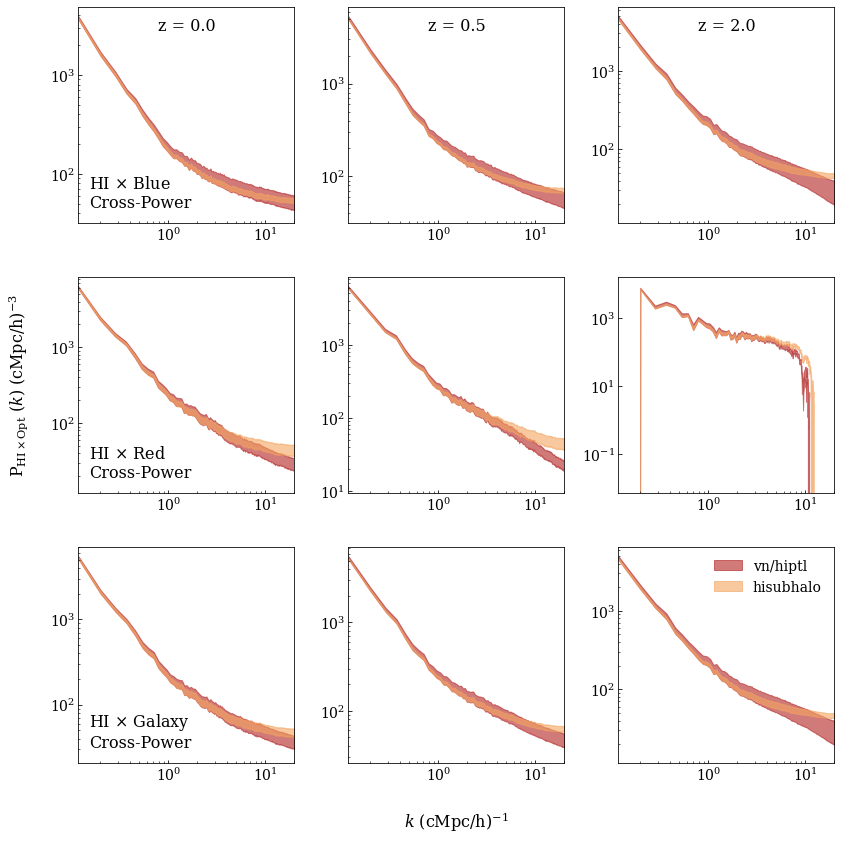

In [7]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl', 'hisubhalo'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red', 'resolved'], 'space':'real',
     'is_groupcat':[True, 'False_True']}

fg = ds.figrid( 'is_groupcat', 'color', 'snapshot', ip)
fg.plotArgs(True, label = 'hisubhalo', color = 'sandybrown')
fg.plotArgs('False_True', label = 'vn/hiptl', color = 'firebrick')
fg.autoFill(alpha = 0.6)
fg.setYLabel(pplib.pklab('HI', 'Opt'))
fg.plot()

## Galaxy Auto Powers

The row values for space: ['real', 'redshift', 'rsd']
The column values for snapshot: [99, 67, 33]


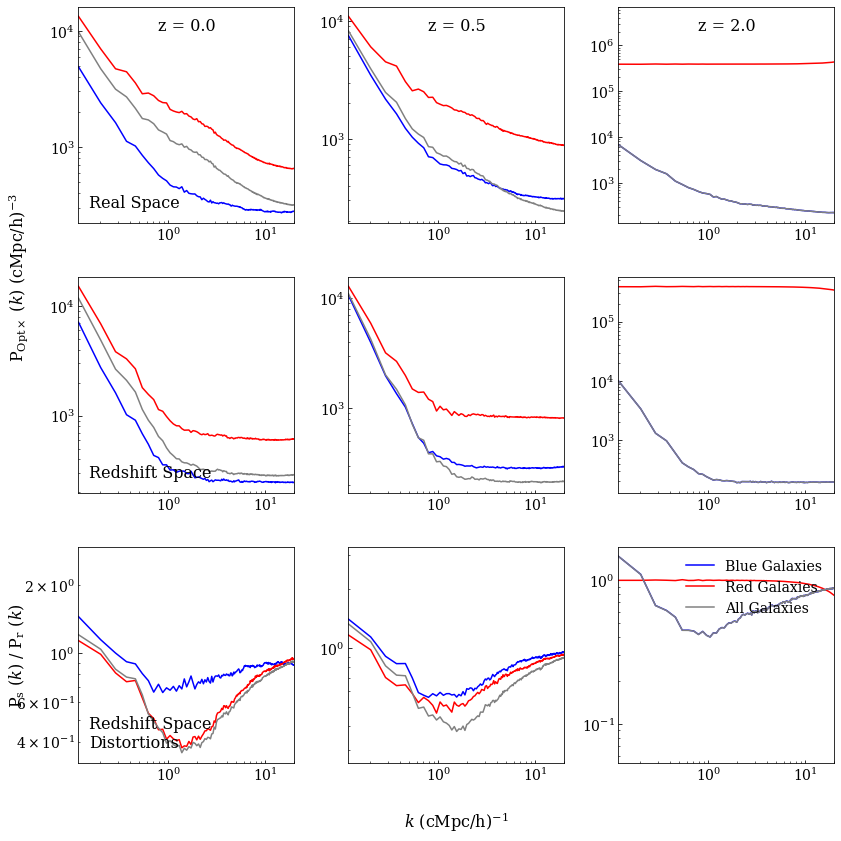

In [8]:
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            ['Red Galaxies', 'Blue Galaxies',
            'All Galaxies', r'Color Ratio'])
ip = {'is_auto':True, 'path':'fiducial', 'color_cut':['0.60', 'None'], 'color':['blue', 'red', 'resolved'],
     'fieldname':'galaxy', 'simname':'tng100', 'gal_res':'diemer'}
fg = ds.figrid('color', 'space', 'snapshot', ip)
fg.setYLabel([pplib.pklab('Opt'), pplib.pkrat('s', 'r')], panels = [slice(0, 2), slice(2, 3)])
fg.plot()

* z = 2 the red galaxy auto power spectrum is nearly all noise, blue and all galaxies are on top of one another

In [9]:
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            ['HI $\\times$ Red\nCross-Power', 'HI $\\times$ Blue\nCross-Power',
            'HI $\\times$ Galaxy\nCross-Power', r'Color Ratio'])

# Paper Figures

## HI x Galaxy Results at z = 0.0

The row values for post_process: ['no key found', 'corr_coef']
The column values for space: ['real', 'redshift']


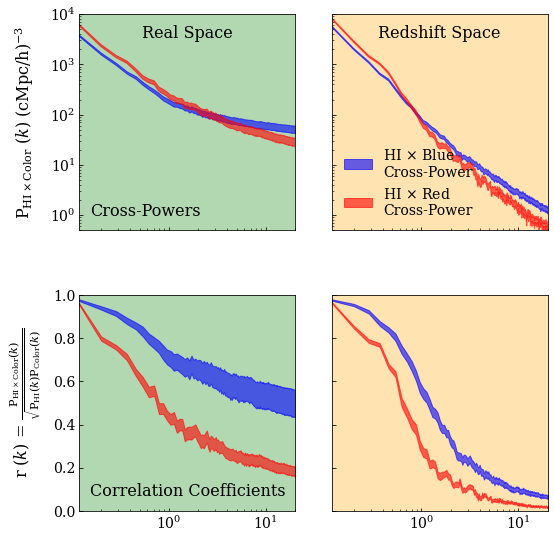

In [10]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'snapshot':99, 'color_cut':'0.60', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'post_process':['no key found', 'corr_coef'],
     'color':['blue', 'red'], 'space':['real', 'redshift']}

fg = ds.figrid('color', 'post_process', 'space', ip)
fg.gspecArgs(hspace = 0.3, wspace = 0.17, xborder = [0.25, 0.25], yborder = [0, 0.25])
fg.rowLabels(['Cross-Powers', 'Correlation Coefficients'])
fg.axisArgs(slc = 'real', facecolor = pplib.rgba('green', 0.6/2), ylim = (.5, 1e4))
fg.axisArgs(slc = 'redshift', facecolor = pplib.rgba('orange', 0.6/2), ylim = (.5, 1e4))
fg.axisArgs(slc = 'corr_coef', yscale = 'linear', ylim = (0, 1))
fg.setDefaultTicksParams()
fg.legendArgs(loc = 'lower left', slc = (0, 1))
defpos = fg._defaultAxLabelPos('y', slc = slice(0, fg.dim[1]))
y1 = 1 - (fg.gspec_args['yborder'][0] + 1.5) / fg.calculateFigsize()[1]
y2 = (fg.gspec_args['yborder'][1] + 2) / fg.calculateFigsize()[1]
fg.setXLabel('')
fg.annotateFig(pplib.pklab('HI', 'Color'), [defpos[0], y1], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
fg.annotateFig(pplib.cclab('HI', 'Color'), [defpos[0], y2], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
# fg.annotatePanel('z = 0.0', [0.95, 0.95], (1, 1), fontsize = 14, va = 'top', ha = 'right')
fg.autoFill(alpha = 0.6)
fg.plot()

The row values for post_process: ['no key found', 'corr_coef']
The column values for : ['no key found']


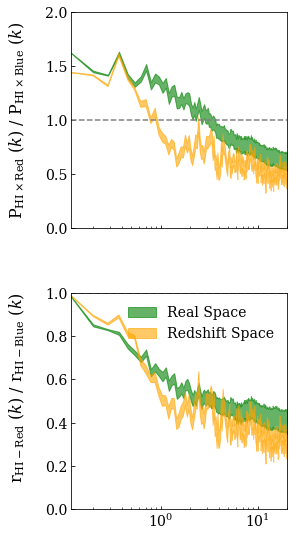

In [11]:
ip = {'post_process':['no key found', 'corr_coef'], 'color':['blue', 'red'], 'snapshot':99, 'HI_fieldname':['vn', 'hiptl'],
     'space':['real', 'redshift'], 'simname':'tng100', 'path':'fiducial'}

ratfg = ds.figrid('space', 'post_process', '', ip)
ratfg.autoNorm({'color':'blue'}, ['model', 'HI_fieldname', 'space'])
ratfg.autoFill(alpha = 0.6)
ratfg.rowLabels(['', ''])
ratfg.setXLabel('')
ratfg.setDefaultTicksParams()
ratfg.gspecArgs(hspace = 0.3, xborder = [0.25, 0], yborder = [0, 0.25])
ratfg.axisArgs(yscale = 'linear', ylim = (0, 2))
ratfg.axisArgs(slc = 'corr_coef', ylim = (0, 1))
ratfg.annotateFig(pplib.pkrat('\\mathrm{HI} \\times \\mathrm{Red}', '\\mathrm{HI} \\times \\mathrm{Blue}', rm = False),
               [defpos[0], y1], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
ratfg.annotateFig(pplib.ccrat('HI-Red', 'HI-Blue'), [defpos[0], y2+.025], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
ratfg.plotOnes()
ratfg.plot()

Text(0.5, 0, '$k$ (cMpc/h)$^{-1}$')

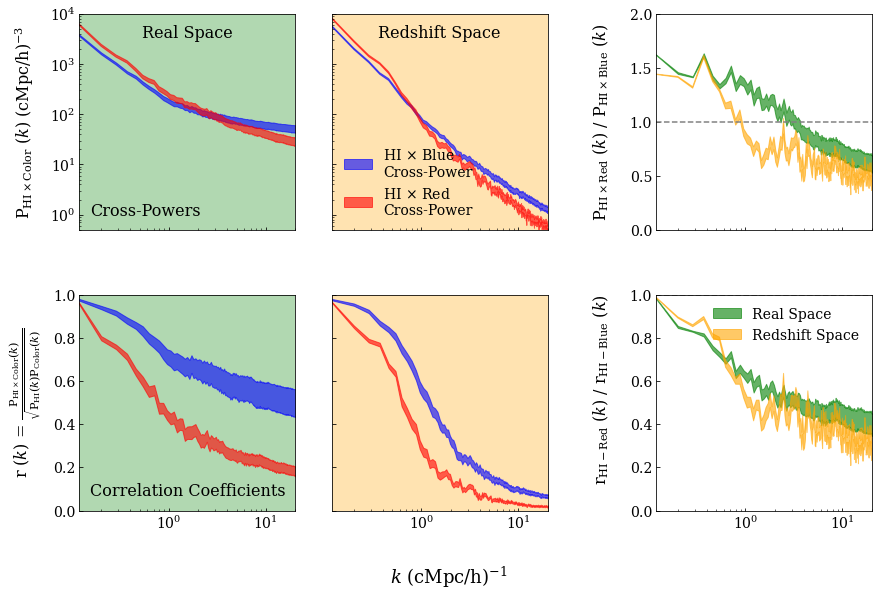

In [12]:
fig = ds.combine([fg, ratfg])
fig.text(0.5, 0, pplib.wnum(), ha = 'center', va = 'top', fontsize = 18)


## Redshift Evolution Figure

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red']


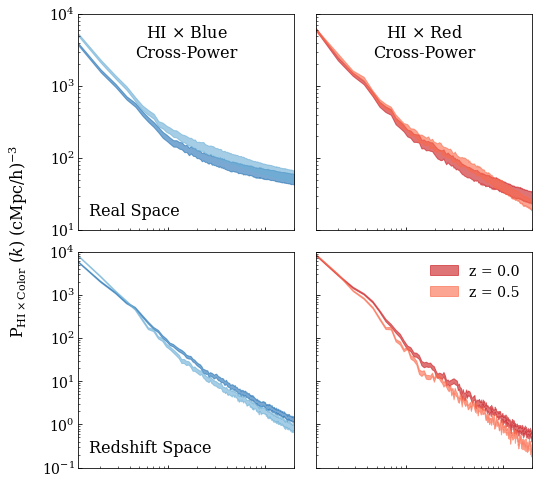

In [13]:
ip = {'is_auto':False, 'color_cut':'0.60', 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67]}
fg = ds.figrid('snapshot', 'space', 'color', ip)
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
cmaps = {'blue':'Blues', 'red':'Reds'}
for col in ['blue', 'red']:
    fg.setCmap(cmaps[col], snapshots, {'color':col})

fg.autoFill(alpha = 0.6)
fg.axisArgs(slc = 'real', ylim = (10, 1e4))
fg.axisArgs(slc = 'redshift', ylim = (.1, 1e4))
fg.tickArgs(slc = 'red', labelleft = False)
XBORDER = [0.33, 0.25]
YBORDER = [0.33, 0.25]
fg.gspecArgs(xborder = XBORDER, yborder = YBORDER, wspace = 0.1, hspace = 0.1)
fg.tickArgs(labelbottom = False)
fg.setYLabel(pplib.pklab('HI', 'Color'))
fg.setXLabel('')
fg.plot()

The row values for space: ['real', 'redshift']
The column values for color: ['ratio']
(2, 1)


(2, 1)

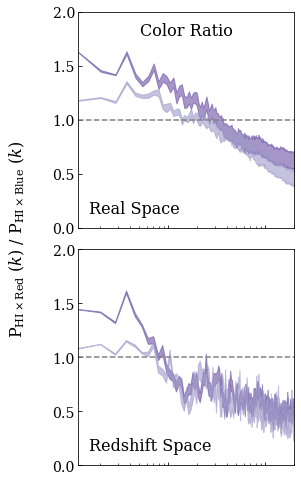

In [14]:
ip = {'is_auto':False, 'color_cut':'0.60', 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['ratio'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67]}
ratfg = ds.figrid('snapshot', 'space', 'color', ip)
print(ratfg.dim)
ratfg.axisArgs(yscale = 'linear', ylim = (0, 2))
ratfg.plotOnes()
ratfg.autoFill(alpha = 0.6)
ratfg.setCmap('Purples', snapshots)
ratfg.legendArgs(rm_legend = True)
ratfg.tickArgs(labelbottom = False)
ratfg.setXLabel('')
ratfg.gspecArgs(hspace = 0.1, yborder = YBORDER)
ratfg.setYLabel(pplib.pkrat('\\mathrm{HI} \\times \\mathrm{Red}', '\\mathrm{HI} \\times \\mathrm{Blue}', rm = False))
ratfg.plot()
ratfg.dim

The row values for space: ['rsd']
The column values for color: ['blue', 'red']
{'blue': 'Blues', 'red': 'Reds'}


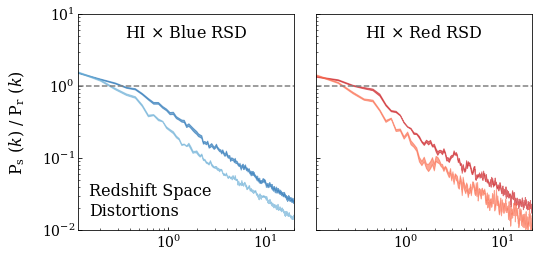

In [15]:
ip = {'is_auto':False, 'color_cut':'0.60', 'space':['rsd'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67]}
rsdfg = ds.figrid('snapshot', 'space', 'color', ip)
rsdfg.row_labels = ['']
for col in ['blue', 'red']:
    rsdfg.setCmap(cmaps[col], snapshots, {'color':col})
rsdfg.col_labels = ['HI $\\times$ Blue RSD', 'HI $\\times$ Red RSD']
rsdfg.autoFill(alpha = 0.6)
rsdfg.setXLabel('')
print(cmaps)
rsdfg.axisArgs(ylim = (.01, 10))
rsdfg.setDefaultTicksParams()
rsdfg.plotOnes()
rsdfg.setYLabel(pplib.pkrat('s', 'r'))
rsdfg.legendArgs(rm_legend = True)
rsdfg.colLabels([r'HI $\times$ Blue RSD', r'HI $\times$ Red RSD'])
rsdfg.gspecArgs(wspace = 0.1, xborder = XBORDER)
rsdfg.plot()

The row values for : ['no key found']
The column values for : ['no key found']


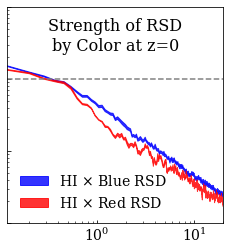

In [16]:
ip = {'is_auto':False, 'color_cut':'0.60', 'space':['rsd'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'snapshot':99,
     'simname':'tng100'}
onefg = ds.figrid('color', '', '', ip)
onefg.plotArgs({'color':'blue'}, {'label':'HI $\\times$ Blue RSD', 'color':'blue'})
onefg.plotArgs({'color':'red'}, {'label':'HI $\\times$ Red RSD', 'color':'red'})
onefg.autoFill({'alpha':0.8})
onefg.axisArgs(ylim = (.01, 10))
onefg.tickArgs(labelleft = False)
onefg.legendArgs(loc = 'lower left')
onefg.annotatePanel('Strength of RSD\nby Color at z=0', [0.5, 0.95], (0,0), ha = 'center', va = 'top', fontsize = 16)
onefg.gspecArgs(yborder = YBORDER)
onefg.setXLabel('')
onefg.plotOnes()
onefg.plot()

Text(0.5, 0, '$k$ (cMpc/h)$^{-1}$')

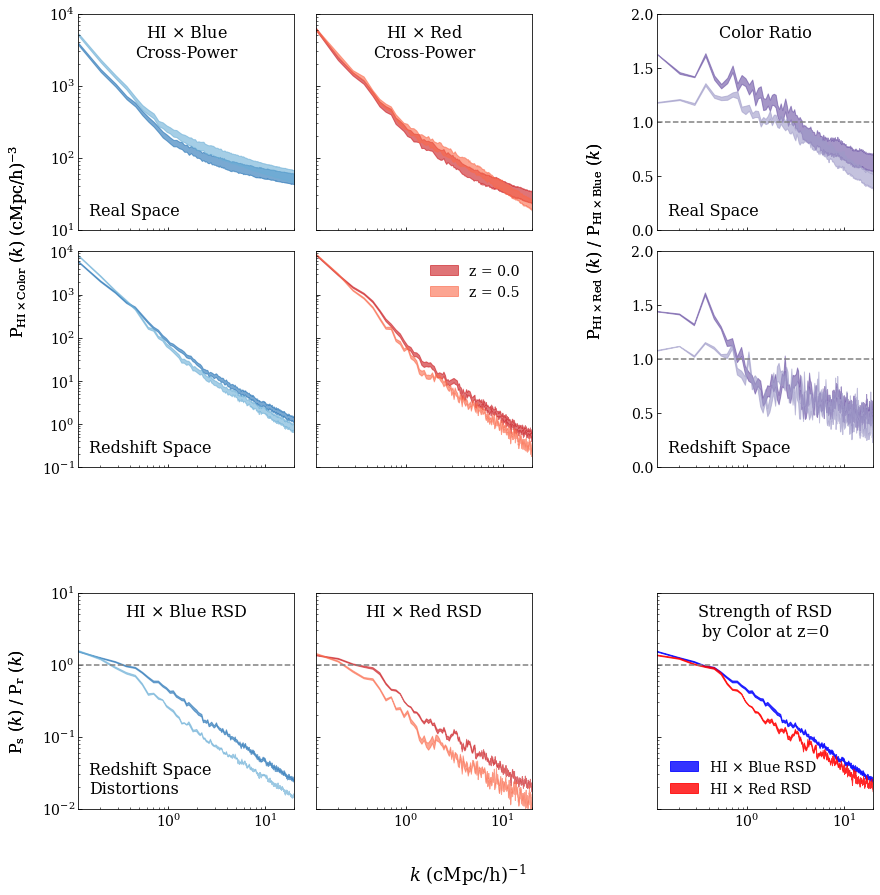

In [17]:
figarr = np.empty((2, 2), dtype = object)
figarr[0,0] = fg; figarr[1, 0] = rsdfg; figarr[0, 1] = ratfg; figarr[1, 1] = onefg
fig = ds.combine(figarr)
fig.text(0.5, 0, pplib.wnum(), ha = 'center', va = 'top', fontsize = 18)
